# Data Loads

https://www.kaggle.com/datasets/lovishbansal123/nasa-asteroids-classification

In [164]:
import pandas as pd
import os

In [165]:
root_dir = "/content/"

In [166]:
data = pd.read_csv(root_dir+"nasa.csv")

Est Dia in M : 소행성 직경 (Meter) ,
Miss Dist (Astronomical) : AU

In [167]:
data.columns

Index(['Neo Reference ID', 'Name', 'Absolute Magnitude', 'Est Dia in KM(min)',
       'Est Dia in KM(max)', 'Est Dia in M(min)', 'Est Dia in M(max)',
       'Est Dia in Miles(min)', 'Est Dia in Miles(max)',
       'Est Dia in Feet(min)', 'Est Dia in Feet(max)', 'Close Approach Date',
       'Epoch Date Close Approach', 'Relative Velocity km per sec',
       'Relative Velocity km per hr', 'Miles per hour',
       'Miss Dist.(Astronomical)', 'Miss Dist.(lunar)',
       'Miss Dist.(kilometers)', 'Miss Dist.(miles)', 'Orbiting Body',
       'Orbit ID', 'Orbit Determination Date', 'Orbit Uncertainity',
       'Minimum Orbit Intersection', 'Jupiter Tisserand Invariant',
       'Epoch Osculation', 'Eccentricity', 'Semi Major Axis', 'Inclination',
       'Asc Node Longitude', 'Orbital Period', 'Perihelion Distance',
       'Perihelion Arg', 'Aphelion Dist', 'Perihelion Time', 'Mean Anomaly',
       'Mean Motion', 'Equinox', 'Hazardous'],
      dtype='object')

In [168]:
data[['Mean Motion','Jupiter Tisserand Invariant','Semi Major Axis','Orbital Period','Aphelion Dist']].corr()

,Mean Motion,Jupiter Tisserand Invariant,Semi Major Axis,Orbital Period,Aphelion Dist
Mean Motion,1.000000,0.992680,-0.901396,-0.859462,-0.840166
Jupiter Tisserand Invariant,0.992680,1.000000,-0.930103,-0.893517,-0.887879
Semi Major Axis,-0.901396,-0.930103,1.000000,0.995248,0.975326
Orbital Period,-0.859462,-0.893517,0.995248,1.000000,0.977630
Aphelion Dist,-0.840166,-0.887879,0.975326,0.977630,1.000000


**컬럼 삭제**

ID , 날짜 등은 의미 없으므로 제거

모두 동일한 값으로 이루어진 컬럼 제거

다른 컬럼과 중복된 컬럼 제거 , 상관계수가 0.9 이상인 컬럼 하나를 제외하고 제거

In [169]:
drop_columns = [
                # 의미 X
                'Neo Reference ID','Name','Orbit ID','Orbit Determination Date','Epoch Date Close Approach',

                # 모두 같은 값
                'Orbiting Body','Equinox',

                # 중복 컬럼
                'Close Approach Date','Relative Velocity km per hr','Miles per hour',
                'Est Dia in M(min)','Est Dia in KM(min)','Est Dia in KM(max)','Est Dia in Miles(min)','Est Dia in Miles(max)','Est Dia in Feet(min)','Est Dia in Feet(max)',
                'Miss Dist.(lunar)','Miss Dist.(kilometers)','Miss Dist.(miles)',

                # 다중공신성
                'Mean Motion','Semi Major Axis','Epoch Osculation','Orbital Period','Aphelion Dist'
                ]
data.drop(drop_columns,axis=1,inplace=True)

print(data.columns, "\n")
print(data["Hazardous"].value_counts())

Index(['Absolute Magnitude', 'Est Dia in M(max)',
       'Relative Velocity km per sec', 'Miss Dist.(Astronomical)',
       'Orbit Uncertainity', 'Minimum Orbit Intersection',
       'Jupiter Tisserand Invariant', 'Eccentricity', 'Inclination',
       'Asc Node Longitude', 'Perihelion Distance', 'Perihelion Arg',
       'Perihelion Time', 'Mean Anomaly', 'Hazardous'],
      dtype='object') 

Hazardous
False    3932
True      755
Name: count, dtype: int64


# EDA

In [170]:
import math
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler,RobustScaler
from pandas.plotting import parallel_coordinates

결측값 확인

In [171]:
data.isna().sum()

Absolute Magnitude              0
Est Dia in M(max)               0
Relative Velocity km per sec    0
Miss Dist.(Astronomical)        0
Orbit Uncertainity              0
Minimum Orbit Intersection      0
Jupiter Tisserand Invariant     0
Eccentricity                    0
Inclination                     0
Asc Node Longitude              0
Perihelion Distance             0
Perihelion Arg                  0
Perihelion Time                 0
Mean Anomaly                    0
Hazardous                       0
dtype: int64

QQ plot

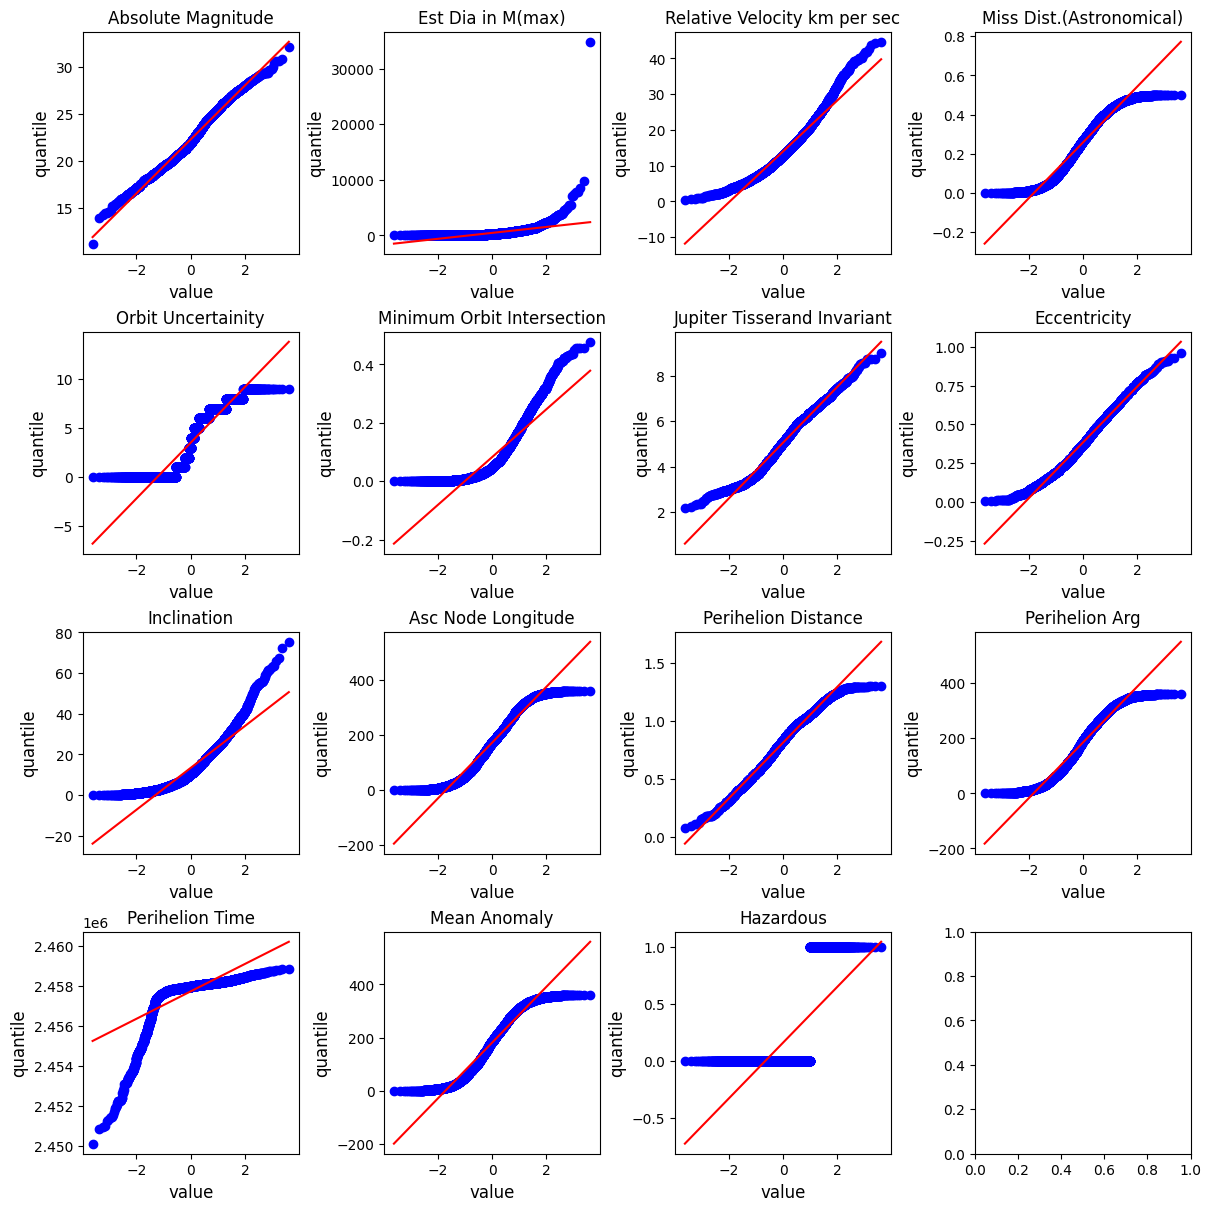

In [172]:
fig, ax = plt.subplots(ncols=4,nrows=math.ceil(len(data.columns)/4),figsize=(12,12),constrained_layout=True)

for i,col in enumerate(data.columns):
  ax_cur = ax[i//4,i%4]
  stats.probplot(data[col],dist=stats.norm,plot=ax_cur)
  ax_cur.set_title(col)
  ax_cur.set_xlabel("value",fontsize=12)
  ax_cur.set_ylabel("quantile",fontsize=12)

plt.show()

소행성 직경 ( 'Est Dis in M(max)' )

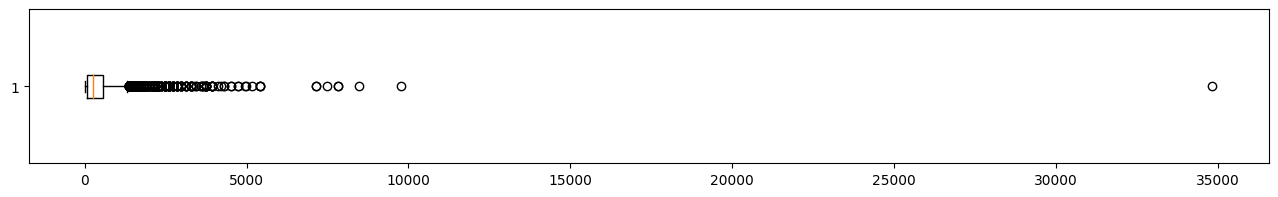

In [173]:
plt.figure(figsize=(16,2))
plt.boxplot(data["Est Dia in M(max)"],vert=0)
plt.show()

In [174]:
print(stats.pearsonr(data["Est Dia in M(max)"],data["Hazardous"]))
print(stats.kstest(data["Est Dia in M(max)"],"norm"))

data["Est Dia in M(max)"] = data["Est Dia in M(max)"].apply(np.log1p)

print("\n",data["Est Dia in M(max)"].describe(),"\n")

print(stats.pearsonr(data["Est Dia in M(max)"],data["Hazardous"]))
print(stats.kstest(data["Est Dia in M(max)"],"norm"))

PearsonRResult(statistic=0.13242435189185175, pvalue=8.731236022444323e-20)
KstestResult(statistic=0.9997670210301113, pvalue=0.0, statistic_location=4.1118757104, statistic_sign=-1)

 count    4687.000000
mean        5.354338
std         1.317403
min         1.181618
25%         4.328413
50%         5.516509
75%         6.343172
max        10.458462
Name: Est Dia in M(max), dtype: float64 

PearsonRResult(statistic=0.32591501294934583, pvalue=2.040608205503633e-116)
KstestResult(statistic=0.9848563123076113, pvalue=0.0, statistic_location=2.385427215241517, statistic_sign=-1)


근일점 시간 ('Perihelion Time')

In [175]:
data["Perihelion Time"].describe()

count    4.687000e+03
mean     2.457728e+06
std      9.442264e+02
min      2.450100e+06
25%      2.457815e+06
50%      2.457973e+06
75%      2.458108e+06
max      2.458839e+06
Name: Perihelion Time, dtype: float64

Scaler

In [176]:
scaler = RobustScaler()

data[data.columns] = scaler.fit_transform(data[data.columns])
data.describe()

,Absolute Magnitude,Est Dia in M(max),Relative Velocity km per sec,Miss Dist.(Astronomical),Orbit Uncertainity,Minimum Orbit Intersection,Jupiter Tisserand Invariant,Eccentricity,Inclination,Asc Node Longitude,Perihelion Distance,Perihelion Arg,Perihelion Time,Mean Anomaly,Hazardous
count,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000,4687.000000
mean,0.083606,-0.080491,0.109170,-0.032905,0.086160,0.320659,-0.007560,0.037263,0.210457,-0.002722,-0.053956,-0.033094,-0.834715,-0.024012,0.161084
std,0.657039,0.653876,0.756183,0.581484,0.513051,0.828376,0.628494,0.664490,0.751665,0.600636,0.660655,0.587636,3.221473,0.567216,0.367647
min,-2.440909,-2.151568,-1.304579,-1.056300,-0.500000,-0.434493,-1.459761,-1.343859,-0.707752,-1.003942,-2.053557,-1.077224,-26.858899,-0.979901,0.000000
25%,-0.409091,-0.589696,-0.465021,-0.524894,-0.500000,-0.300714,-0.518660,-0.484592,-0.367680,-0.520770,-0.552190,-0.534402,-0.537796,-0.520839,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.590909,0.410304,0.534979,0.475106,0.500000,0.699286,0.481340,0.515408,0.632320,0.479230,0.447810,0.465598,0.462204,0.479161,0.000000
max,2.318182,2.452876,3.288395,0.936670,1.000000,3.949471,2.007616,2.164631,4.474074,1.089184,1.273713,0.966392,2.954902,0.919135,1.000000


<Axes: >

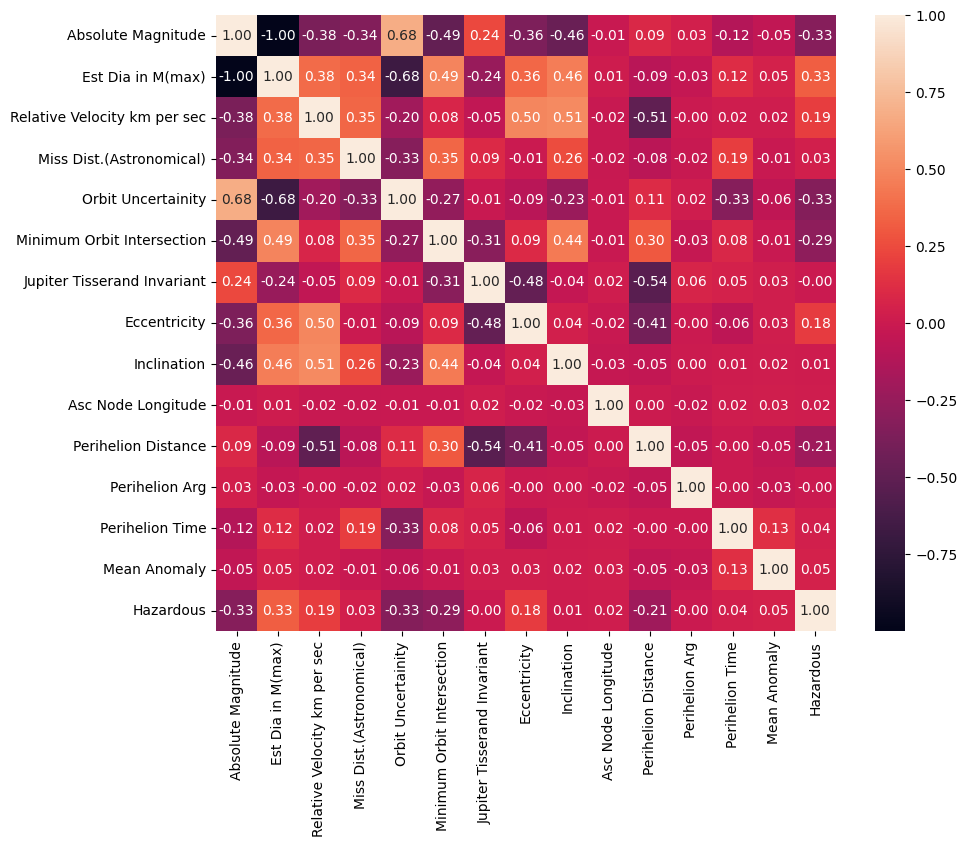

In [177]:
corr = data.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,fmt=".2f")

# Model

In [178]:
from sklearn.model_selection import StratifiedKFold
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix

In [179]:
rd_state = 20109

데이터 분할

In [180]:
x_data = data.drop(["Hazardous"],axis=1)
y_data = data["Hazardous"]

kf = StratifiedKFold(n_splits=5,shuffle=True,random_state=rd_state)

분류 모델 비교

In [181]:
models = {"RF":RandomForestClassifier(),"AdB":AdaBoostClassifier(),"SVC":SVC()}

scores = pd.DataFrame(columns=["model","accuracy","f1_score"])

for name,model in models.items():
  f1, acc = [], []
  for train_idx, test_idx in kf.split(x_data,y_data):
    x,y = x_data.iloc[train_idx],y_data.iloc[train_idx]
    x_test,y_test = x_data.iloc[test_idx],y_data.iloc[test_idx]

    model.fit(x,y)
    y_pred = model.predict(x_test)

    f1.append(f1_score(y_test,y_pred))
    acc.append(accuracy_score(y_test,y_pred))

  model_score = pd.DataFrame(data=[[name,np.mean(acc),np.mean(f1)]],columns=["model","accuracy","f1_score"])
  scores = pd.concat([model_score,scores],ignore_index=True)

scores.sort_values(by="f1_score",ascending=False)

,model,accuracy,f1_score
1,AdB,0.996586,0.989382
2,RF,0.996160,0.988026
0,SVC,0.952422,0.847450


하이퍼 파라미터 튜닝

In [182]:
weights = {}
for i,w in enumerate(y_data.value_counts()):
  weights[i] = y_data.count() / w

print(weights)

{0: 1.1920142421159716, 1: 6.207947019867549}


In [183]:
model = RandomForestClassifier()

param_grid = {
    "n_estimators":[80,100,120],
    "max_depth":[None,5,6,7],
    "n_jobs":[-1],
    "class_weight":[None,weights]
}

search = HalvingGridSearchCV(model,param_grid,scoring="f1",n_jobs=-1).fit(x_data,y_data)

In [184]:
pd.DataFrame(search.cv_results_)[["params","mean_test_score"]].sort_values(["mean_test_score"],ascending=False).head(10)

,params,mean_test_score
34,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.990150
32,"{'class_weight': None, 'max_depth': None, 'n_e...",0.990019
33,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.989537
29,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.983026
30,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.982934
25,"{'class_weight': None, 'max_depth': None, 'n_e...",0.982933
31,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.981089
26,"{'class_weight': None, 'max_depth': None, 'n_e...",0.980782
15,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.979471
20,"{'class_weight': {0: 1.1920142421159716, 1: 6....",0.979471


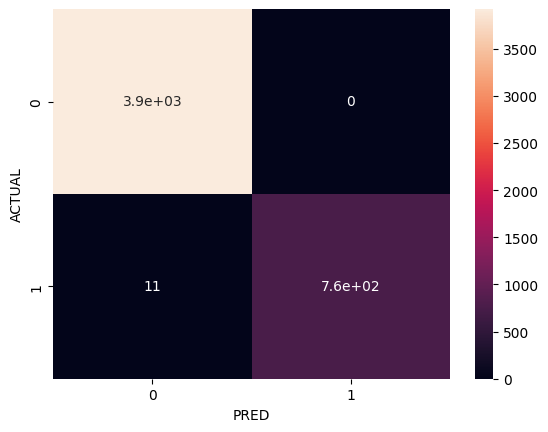

In [189]:
cf = RandomForestClassifier(n_estimators=120,max_depth = 6,n_jobs = -1,class_weight=weights)
cf.fit(x_data,y_data)

cfm = confusion_matrix(cf.predict(x_data),y_data,labels=[0,1])

sns.heatmap(cfm,annot=True)
plt.xlabel("PRED")
plt.ylabel("ACTUAL")
plt.show()